In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
boston = datasets.load_boston()

In [28]:
boston['data'].shape

(506, 13)

In [29]:
# so far we have 2D NumPy array (506 rows and 13 columns)

In [30]:
df = pd.DataFrame(data=boston['data'], 
                  columns=boston['feature_names'])
df['PRICE'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [32]:
# there are no NaN's values per column, no need to clean the data

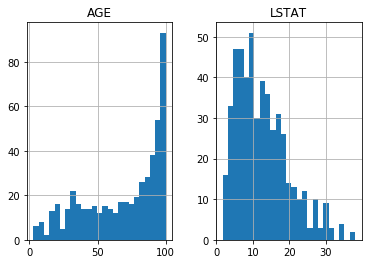

In [33]:
hist = df.hist(column= ['AGE', 'LSTAT'], bins= 25)

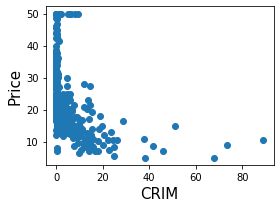

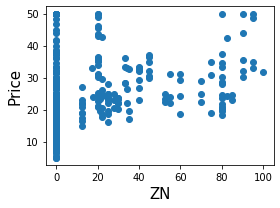

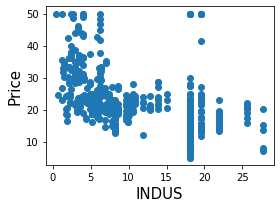

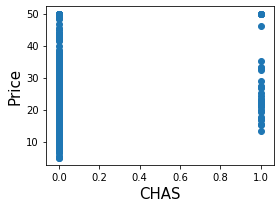

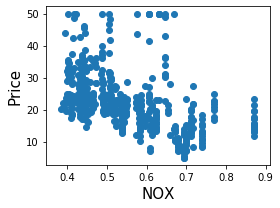

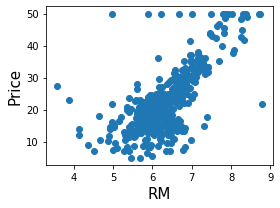

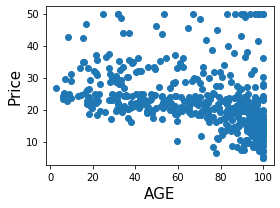

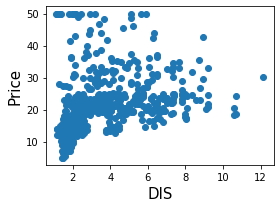

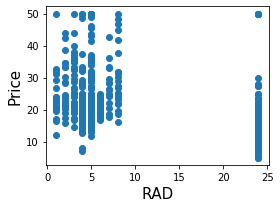

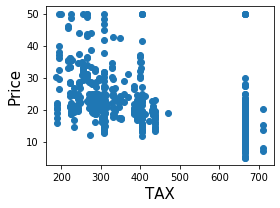

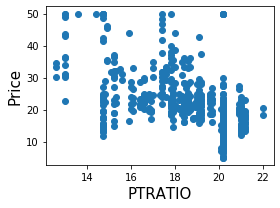

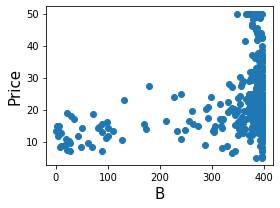

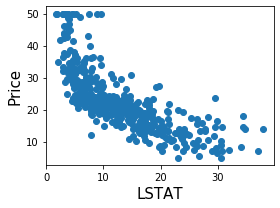

In [34]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

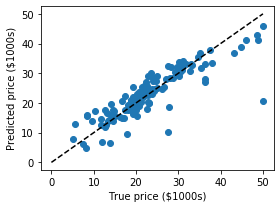

In [35]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)
reg = LinearRegression()
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

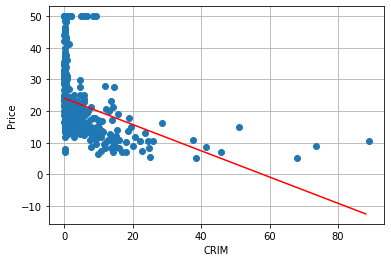

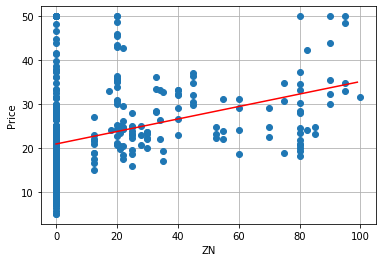

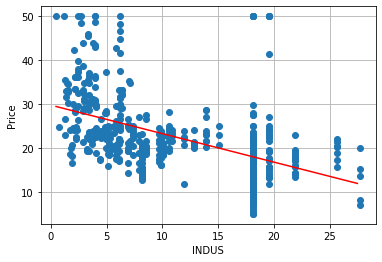

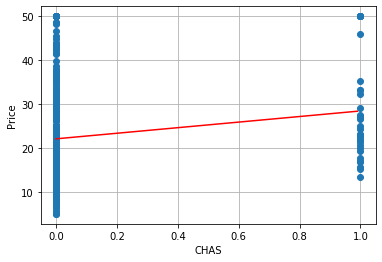

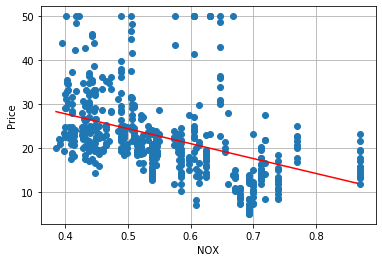

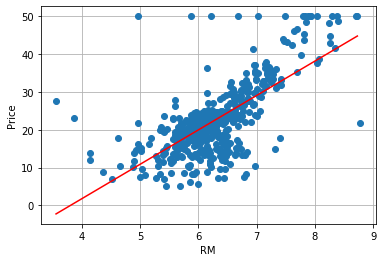

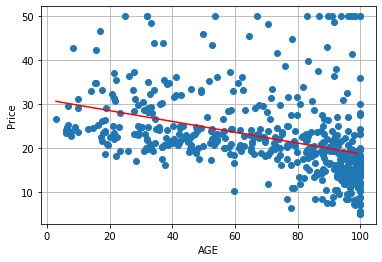

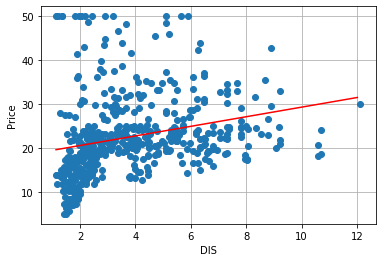

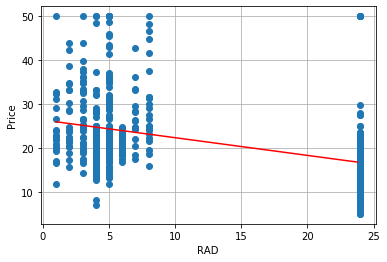

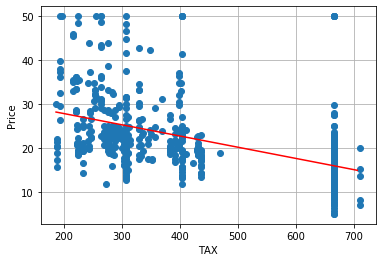

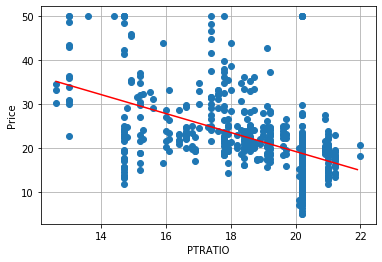

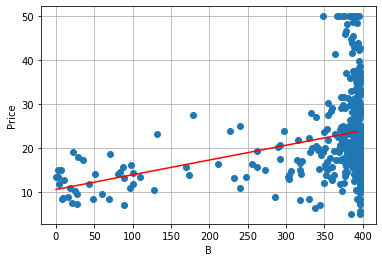

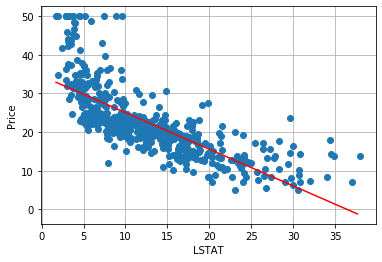

In [36]:
Y = boston.target
for index, feature_name in enumerate(boston.feature_names):
    X = boston.data[:, index]
    X = X.reshape((-1, 1))
    reg.fit(X, Y)
    lin_reg = reg.score(X, Y)
    intercept = reg.intercept_
    coef = reg.coef_
    x = np.linspace(X.min(), X.max(), 100, endpoint=False)
    y = intercept + coef*x
    plt.figure("Plot")
    plt.plot(X, Y, 'o', x, y, 'r-')
    plt.xlabel('{}'.format(df.columns[index]))
    plt.ylabel('Price')
    plt.grid()
    plt.show()